 Multi-Layer Perceptrons and ARIMA Model for Time Series Forecasting



**Problem 1a:** We've discussed in class about the perceptron, or 'artificial neuron', the simplest artifical neural unit of processing that enables machines to learn linear mappings between inputs and outputs, as shown below.  Here, we will implement a Multi-Layer Perceptron (MLP), which enables *non-linear* mappings, and will use it to predict the next number in a sequence.

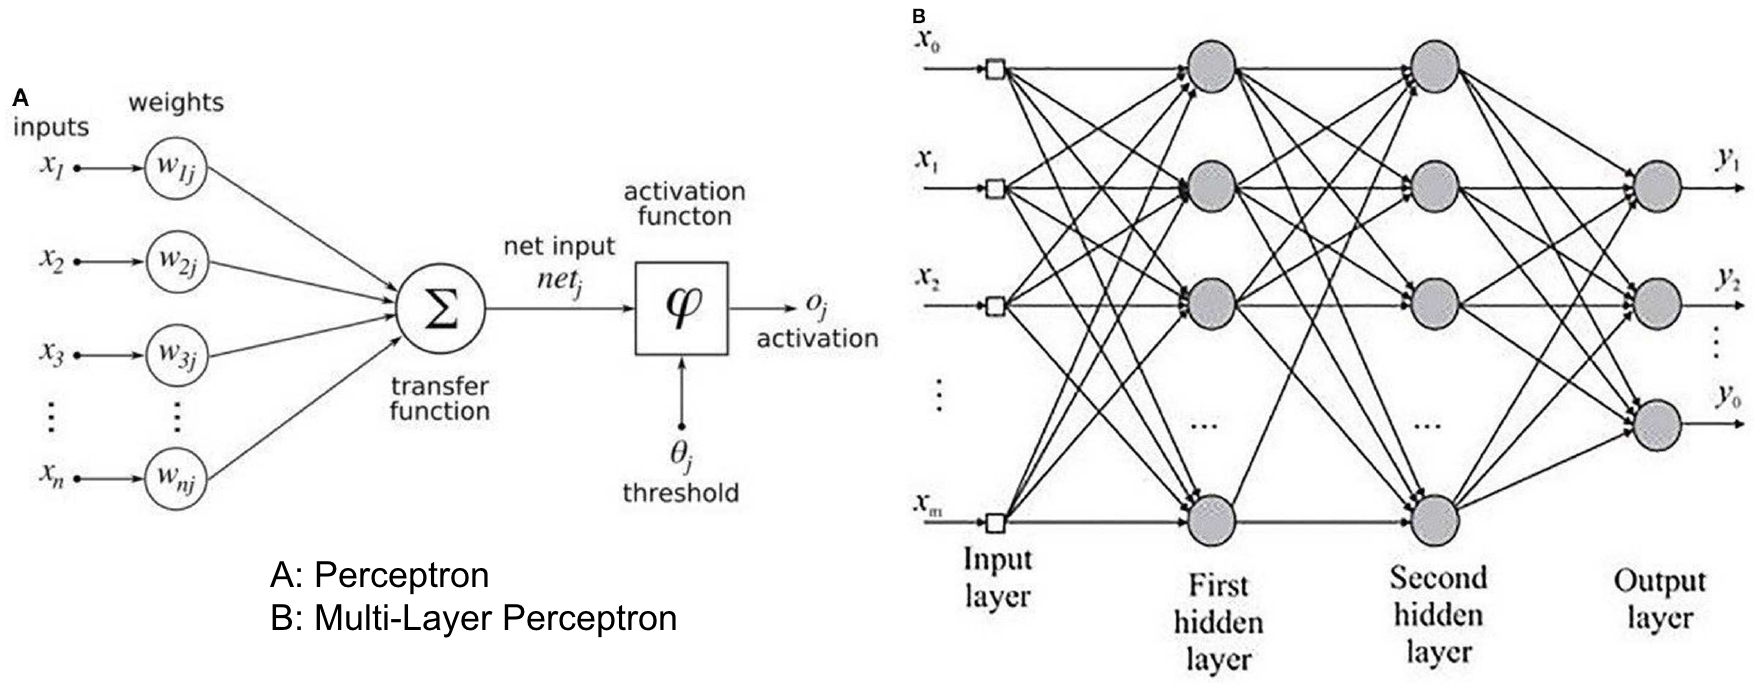

In [1]:
#Imports
import numpy as np

In [2]:
# PREPROCESS DATA for input/output: split a univariate sequence into samples
# 3 inputs --> 1 output
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


**YOUR TASK:** Define a model using Keras Sequential API that correctly predicts the output given a new input sequence of 3 numbers, train your model, plot the model training loss, and demonstrate a sample prediction.  Provide comments to explain each line of your model.  What is the impact on the accuracy of your prediction when you have no hidden layers (perceptron) vs. at least 1 hidden layer (MLP)?

In [4]:
#Some Imports to help you as a start; feel free to add more as needed
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
import tensorflow as tf

In [5]:
# Your code here: define the model
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_shape=[X.shape[1]], activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss='mean_squared_error')

In [6]:
# Your code here: train the model via the Keras fit function
history=model.fit(X,y, epochs=150, verbose = 0)

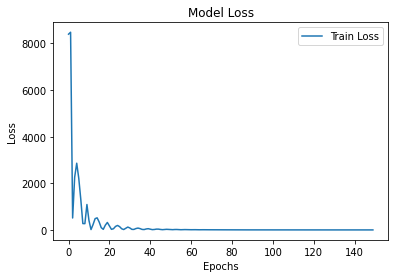

In [7]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [8]:
# Your code here: Demonstrate Prediction using model.predict
x_input = np.array([70, 80, 90]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))
prediction = model.predict(x_input)
print(x_input)
print(prediction)

[[70 80 90]]
[[99.95191]]


**Problem 1b:** What happens when you try to predict the next number for the following test sequence: 1^2, 2^2, 3^2? Does the model you developed in Part 1a work here?  Explain.

In [9]:
# Your code here: Demonstrate Prediction using model.predict
x_input = np.array([1, 4, 9]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))
prediction = model.predict(x_input)
print(x_input)
print(prediction)

[[1 4 9]]
[[15.258751]]


**Problem 2:** Repeat Problem #1, but this time train your model to predict the next number in the sequence of squares (n^2, where n = 1, 2, 3, ...).  Also, this time use Keras Functional API to build your model.

In [10]:
# Define input sequence
raw_seq = [1, 4, 9, 16, 25, 36, 49, 64, 81]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[1 4 9] 16
[ 4  9 16] 25
[ 9 16 25] 36
[16 25 36] 49
[25 36 49] 64
[36 49 64] 81


In [11]:
#Some Imports to help you as a start; feel free to add more as needed
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers, Input, Model

In [12]:
# Your code here: define the model
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_shape=[X.shape[1]], activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss='mean_squared_error')

In [13]:
# Your code here: train the model via the Keras fit function
history=model.fit(X,y, epochs=250, verbose = 0)

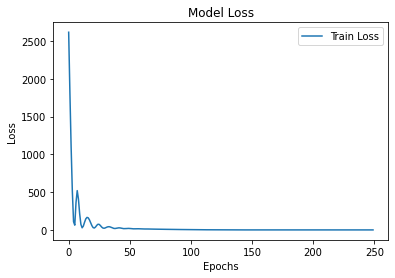

In [14]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [15]:
# Your code here: Demonstrate Prediction using model.predict; feel free to show
# additional examples than the one already provided here
x_input = np.array([49, 64, 81]) # predict the ooutput for this input
x_input = x_input.reshape((1, n_steps))
prediction = model.predict(x_input)
print(x_input)
print(prediction)

[[49 64 81]]
[[101.778366]]


**Problem 3:** Now we will analyze the Medical Expenditures Dataset (dataSheet2.csv). [Refer to https://www.frontiersin.org/articles/10.3389/fdata.2020.00004/full for more details on dataset and problem.]  This dataset contains average daily expenditures on a medicine.  We will break up this dataset into train and test sets and design a Multi-Layer Perceptron to forecast average daily medical expenditures for a future time-step after training on a number of time-steps from the past.

In [16]:
#MOUNTING GOOGLE DRIVE WHERE DATA IS STORED
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [17]:
#GET THE DATA (Remember to change the path to the location of your saved file!)
import pandas as pd
data = pd.read_csv("/gdrive/My Drive/dataSheet2.csv")
data.head() 

,Date,Average Daily Expenditure on Medicine B in Dollars
0,1/2/2011,114.874671
1,1/3/2011,112.041149
2,1/4/2011,167.311618
3,1/5/2011,241.058332
4,1/6/2011,124.520457


In [18]:
import numpy as np
#JUST GET THE MEDICINE EXPENDITURE VALUES
data1 = data["Average Daily Expenditure on Medicine B in Dollars"]
data1Arr = np.array(data1)
print(data1.shape)
print(data1Arr.shape)

(1565,)
(1565,)


In [19]:
#DIFFERENT WAY OF SPLITTING DATA INTO INPUT/OUTPUT SEQUENCES
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y)

In [20]:
#Split data set into testing dataset and train dataset
train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
train = data1Arr[0:train_size]
test = data1Arr[train_size:len(data1Arr)]
print(train.shape)
print(test.shape)
# setup look_back window 
look_back = 7
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

#Print a few of the samples to check format
for i in range(5):
  print(trainX[i], trainY[i])

(1252,)
(313,)
[114.8746706 112.0411489 167.3116175 241.0583317 124.5204571 113.8333722
 149.2555453] 159.0992442
[112.0411489 167.3116175 241.0583317 124.5204571 113.8333722 149.2555453
 159.0992442] 187.9188007
[167.3116175 241.0583317 124.5204571 113.8333722 149.2555453 159.0992442
 187.9188007] 138.774122
[241.0583317 124.5204571 113.8333722 149.2555453 159.0992442 187.9188007
 138.774122 ] 176.4914938
[124.5204571 113.8333722 149.2555453 159.0992442 187.9188007 138.774122
 176.4914938] 165.71289480000002


**YOUR TASK:** Design an MLP taking into account what you have learned from Problems #1 and #2 that achieves as low RMSE (Root Mean Square Error) as possible.  Consider the impact of number of look-back time-steps.  Experiment with and comment on results of changing 3 of the following parameters, providing reasons for your observations.

1.   Number of hidden layers
2.   Number of neurons per layer
3.   Activation Function
4.   Number of epochs
5.   Batch size
6.   Optimizer/Learning Rate

You will be graded on your analysis of these factors, not on the accuracy (RMSE) you achieve.  Show plots of training/test loss for your 3 chosen experiments and a plot of actual vs. prediction for your best model.  Does the same MLP that you designed for Problems #1 and #2 work well for Problem #3?

In [21]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

# YOUR CODE HERE: define model
model = keras.Sequential()
model.add(keras.layers.Dense(64, input_shape=[trainX.shape[1]], activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1))
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05),
              loss='mean_squared_error')

In [22]:
# YOUR CODE HERE: Train Model
history=model.fit(trainX,trainY, epochs=250, verbose = 0, validation_split=0.2)

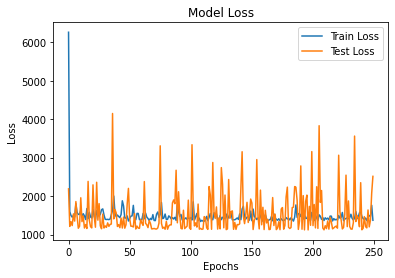

In [23]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [24]:
#MODEL EVALUATION via RMSE
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): ', train_score)
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): ', test_score)

Train Root Mean Squared Error(RMSE):  1871.9793701171875
Test Root Mean Squared Error(RMSE):  3770.78955078125


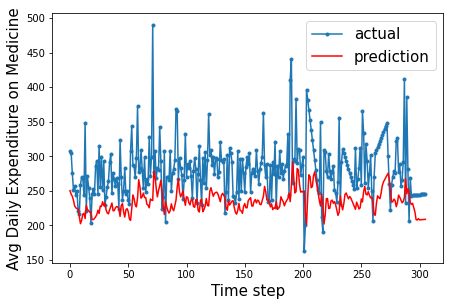

In [25]:
# Demonstrate Prediction and Create Plot to Compare Prediction to Actual
short = 313 #how much of the test sequence to plot (currently: all of it)
test_predict = model.predict(testX)

def prediction_plot(testY, test_predict):
  len_prediction=[x for x in range(len(testY[:short]))]
  plt.plot(len_prediction, testY[:short], marker='.', label="actual")
  plt.plot(len_prediction, test_predict[:short], 'r', label="prediction")
  plt.tight_layout()
  plt.subplots_adjust(left=0.07)
  plt.ylabel('Avg Daily Expenditure on Medicine', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

prediction_plot(testY, test_predict)

**Problem 4:** Now let's repeat Problem #3 using a non-DL model for comparison.  Use an ARIMA Model for time-series forecasting on the medicine expenditures dataset.  Your task is to experiment with the lag order (p), degree of differencing (d), and order of the moving average (q).  Discuss the impact of these factors on your final prediction error.  How does this model compare with your MLP model from Problem #3?  Which one is better?  Why?  Why are they both still not "good enough"?

In [26]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#ARIMA model training and prediction (NOTE: training may take ~10min)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	###model = ARIMA(history, order=(p,d,q)) <--- YOUR TASK HERE: modify p, d, q
	model = ARIMA(history, order=(5,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test MSE: 2510.922


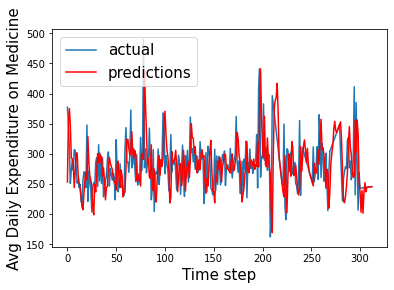

In [27]:
from matplotlib import pyplot
# plotting actual vs. ARIMA prediction
pyplot.plot(test, label='actual')
pyplot.plot(predictions, color='red', label='predictions')
pyplot.ylabel('Avg Daily Expenditure on Medicine', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

In [28]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 1803.506


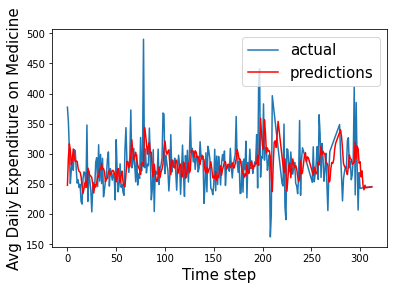

In [29]:
from matplotlib import pyplot
# plotting actual vs. ARIMA prediction
pyplot.plot(test, label='actual')
pyplot.plot(predictions, color='red', label='predictions')
pyplot.ylabel('Avg Daily Expenditure on Medicine', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

In [30]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 2818.357


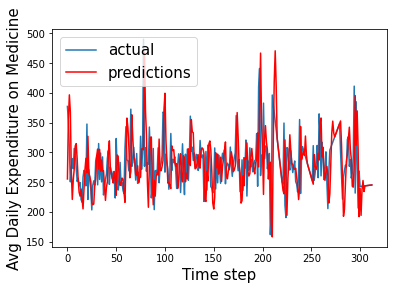

In [31]:
from matplotlib import pyplot
# plotting actual vs. ARIMA prediction
pyplot.plot(test, label='actual')
pyplot.plot(predictions, color='red', label='predictions')
pyplot.ylabel('Avg Daily Expenditure on Medicine', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

**WHAT TO SUBMIT:** Please download and submit (1) this jupyter notebook (.ipynb file) with your code and comment additions as well as (2) a pdf summarizing your analysis of results (plots/explanations) for each problem on courseworks by **October 5th, 2020 at 11:59pm**.